In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Summary statistics of the dataset:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.30000

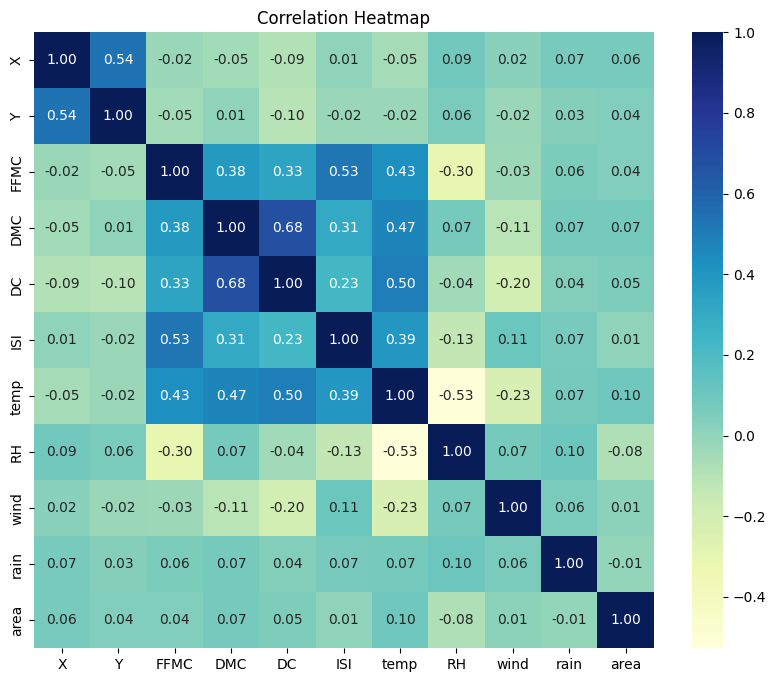

In [69]:
# Load the dataset
df = pd.read_csv("forestfires.csv")

print(df.head())

print("\nSummary statistics of the dataset:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

numeric_df = df.select_dtypes(include=[np.number])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [70]:
label_cols = ['month', 'day']
encoder = LabelEncoder()


for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

X = df.drop(['area'], axis=1)
y = df['area']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X.columns).head())


          X         Y     month       day      FFMC       DMC        DC  \
0  1.008313  0.569860  0.284222 -1.423121 -0.805959 -1.323326 -1.830477   
1  1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
2  1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
3  1.440925  1.383722  0.284222 -1.423121  0.191362 -1.212361 -1.898266   
4  1.440925  1.383722  0.284222  0.136781 -0.243833 -0.931043 -1.798600   

        ISI      temp        RH      wind      rain  
0 -0.860946 -1.842640  0.411724  1.498614 -0.073268  
1 -0.509688 -0.153278 -0.692456 -1.741756 -0.073268  
2 -0.509688 -0.739383 -0.692456 -1.518282 -0.073268  
3 -0.004756 -1.825402  3.233519 -0.009834  0.603155  
4  0.126966 -1.291012  3.356206 -1.238940 -0.073268  


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (413, 12), Testing set size: (104, 12)


In [72]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [73]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 11748.943154648765
R² Score: 0.003293158248679595


In [74]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [ 0.00000000e+00 -1.16601931e+01 -4.78191115e-02 -5.60866370e-01
  3.06671063e-03]
Mean Cross-Validation R² Score: -2.4531623826351616


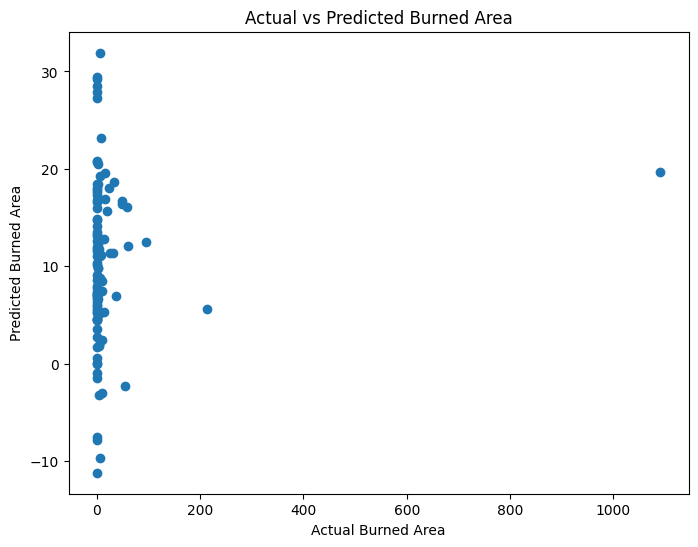

In [75]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Burned Area")
plt.ylabel("Predicted Burned Area")
plt.title("Actual vs Predicted Burned Area")
plt.show()


In [76]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# Print the evaluation metrics
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R² Score: {rf_r2}")


Random Forest - Mean Squared Error: 12097.57474104877
Random Forest - R² Score: -0.026282564677344578
